In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/mlproj/train.csv")
xtest=pd.read_csv("/content/drive/MyDrive/mlproj/test.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head(5)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,3209501,3209501,win8defender,1.1.15100.1,4.18.1807.18075,1.273.869.0,0,7.0,0,NaN,...,33108.0,1,NaN,0.0,1,1,0.0,0.0,10.0,1
1,3843280,3843280,win8defender,1.1.14901.4,4.16.17656.18052,1.269.1134.0,0,7.0,0,NaN,...,63175.0,1,0.0,0.0,1,0,1.0,0.0,4.0,0
2,6712531,6712531,win8defender,1.1.15100.1,4.18.1806.18062,1.273.315.0,0,7.0,0,NaN,...,7271.0,0,NaN,0.0,0,0,0.0,0.0,15.0,0
3,7714596,7714596,win8defender,1.1.15200.1,4.18.1807.18075,1.275.997.0,0,7.0,0,NaN,...,63140.0,1,0.0,0.0,0,0,0.0,1.0,1.0,1
4,5103377,5103377,win8defender,1.1.15200.1,4.18.1807.18075,1.275.941.0,0,7.0,0,2264.0,...,20388.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1


In [5]:
pd.set_option('display.float_format',  '{:,}'.format)
pd.set_option('display.max_columns', None)
df.describe()


,Unnamed: 0,MachineIdentifier,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,"1,427,437.0","1,427,437.0","1,427,437.0","1,422,280.0","1,427,437.0","69,034.0","1,421,542.0","1,421,542.0","1,421,542.0","1,427,437.0","1,427,437.0","1,375,560.0","986,154.0","1,427,400.0","1,427,437.0","1,427,437.0","1,427,437.0","1,421,568.0","1,427,437.0","1,341,816.0","1,418,037.0","1,412,800.0","1,425,708.0","1,412,048.0","1,411,043.0","1,420,847.0","1,420,846.0","1,420,837.0","1,419,107.0","1,419,108.0","1,427,437.0","1,414,742.0","1,419,961.0","1,419,987.0","1,419,987.0","1,384,630.0","1,427,437.0","1,427,437.0","1,417,794.0","1,427,437.0","1,427,437.0","241,579.0","1,401,832.0","519,926.0","1,398,127.0","1,401,853.0","1,427,437.0","521,212.0","1,424,803.0","1,427,437.0","1,427,437.0","1,416,211.0","1,378,774.0","1,378,774.0","1,427,437.0"
mean,"4,464,695.382212315","4,464,695.382212315",5.604450494137394e-06,6.844937705655708,0.017377299313384758,"1,660.0991830112698","47,842.469757488696",1.3265242954481824,1.020874515139194,0.9880176848435342,108.03279093928488,"81,212.4282096019",24.86905696270562,169.6826488720751,27.885075138167217,"15,719.095918068539",575.18305816649,0.9457317553574645,2.73216961589198e-05,0.0004628056305782611,126.558589091822,0.9786077293318234,12.762830116685885,"2,220.036228938393","239,156.3395141041",3.989496406016974,4.531052626393008,"2,369.9517326758805","513,418.1661770395","377,581.4587311184",0.07721811890822503,"6,108.919588165192",16.677648541051486,"1,547.1332730510912",897.225005581037,"1,124,701,477.4043896","15,833.072051516108",974.9731693938156,14.600503317125055,60.42090754267964,0.0005107055512782701,1.6557730597444313e-05,9.273579145004537e-06,0.0002500355819866673,402.82636555906583,"33,037.29573928222",0.4857566393473057,0.0,0.007161691826870101,0.1251908140254176,0.03812357393005786,0.05763336113050951,0.28362806377259797,7.879335554630418,0.4997929856098728
std,"2,575,294.6309352727","2,575,294.6309352727",0.00236736626031672,1.027448783154195,0.13067264726864433,"1,002.9467899189453","14,020.215118087319",0.5226711543495203,0.16685084303110967,0.10880600890422466,63.0571444010762,"48,934.38763699521",5.599430590915355,89.3175325936394,65.6245710369594,"2,191.907984576137",248.07872205676145,0.22654632720309756,0.005226946414850259,0.021507947049337443,42.67610219529625,0.14468813441911732,"14,050.914044163064","1,315.8887018215123","71,819.69432506678",2.079389004918056,1.287381053261403,840.7706097725458,"361,247.4979786427","326,058.622271356",0.2669373164977354,"4,950.819382141064",5.890821512812066,367.7554843090792,213.9550026422168,"1,888,280,702.0815697","1,964.602951808243","2,937.733765782352",10.190221483573287,44.96258705763817,0.02259303186191914,0.0040690938767447065,0.00304

In [6]:
df.info()
# total features=83
# dtypes: float64(36), int64(18), object(29)
# no. of rows =1427437

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427437 entries, 0 to 1427436
Data columns (total 84 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   Unnamed: 0                                         1427437 non-null  int64  
 1   MachineIdentifier                                  1427437 non-null  int64  
 2   ProductName                                        1427437 non-null  object 
 3   EngineVersion                                      1427437 non-null  object 
 4   AppVersion                                         1427437 non-null  object 
 5   AvSigVersion                                       1427437 non-null  object 
 6   IsBeta                                             1427437 non-null  int64  
 7   RtpStateBitfield                                   1422280 non-null  float64
 8   IsSxsPassiveMode                                   1427437 non

In [7]:
# checking if the target column is balanced or biased

0    714014
1    713423
Name: HasDetections, dtype: int64


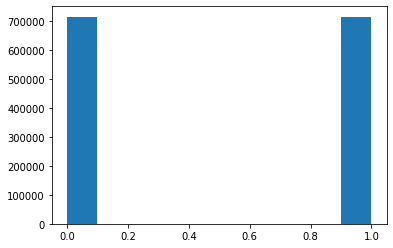

In [8]:
print(df["HasDetections"].value_counts(dropna=False))
plt.hist(df["HasDetections"]);
# both 0 and 1 values occur around 7 lakh times....so the target is Balanced

In [9]:
# some 200 duplicate rows in the df
df=df.drop_duplicates()
df.shape

(1427437, 84)

In [10]:
pd.set_option('display.max_rows', None)
describem = []
for col in df.columns:
    describem.append((col, df[col].isnull().sum() * 100 / df.shape[0],df[col].dtype))   
describem = pd.DataFrame(describem, columns=['feature', '% missing values','type'])
describem.sort_values('% missing values', ascending=False)

,feature,% missing values,type
29,PuaMode,99.97702175297404,object
42,Census_ProcessorClass,99.5983010108327,object
9,DefaultBrowsersIdentifier,95.16377955734649,float64
69,Census_IsFlightingInternal,83.07603067595979,float64
53,Census_InternalBatteryType,71.07599144480632,object
72,Census_ThresholdOptIn,63.57625590481401,float64
76,Census_IsWIMBootEnabled,63.48616436312076,float64
32,SmartScreen,35.605424267410754,object
16,OrganizationIdentifier,30.914359092555397,float64
30,SMode,5.998233196981723,float64


In [11]:
# missing value percentage >60 percent====removal
# df.drop(columns=highmiss,inplace=True)
# xtest.drop(columns=highmiss,inplace=True)

In [12]:
droplist = describem[describem["% missing values"]>60]
highmiss=droplist["feature"]
print(highmiss)
df.drop(columns=highmiss,inplace=True)
xtest.drop(columns=highmiss,inplace=True)

9      DefaultBrowsersIdentifier
29                       PuaMode
42         Census_ProcessorClass
53    Census_InternalBatteryType
69    Census_IsFlightingInternal
72         Census_ThresholdOptIn
76       Census_IsWIMBootEnabled
Name: feature, dtype: object


In [13]:
df.shape

(1427437, 77)

In [14]:
describes = []
for col in df.columns:
    describes.append((col, df[col].value_counts(dropna=False).values[0] * 100/df.shape[0],df[col].dtype))   
desc = pd.DataFrame(describes, columns=['feature', 'skewness','type'])
desc.sort_values('skewness', ascending=False)

,feature,skewness,type
6,IsBeta,99.99943955495058,int64
27,AutoSampleOptIn,99.9972678303841,int64
62,Census_IsPortableOperatingSystem,99.94892944487218,int64
34,Census_DeviceFamily,99.83740088003884,object
32,UacLuaenable,99.27569482926391,float64
70,Census_IsVirtualDevice,99.1006258069533,float64
2,ProductName,98.93900746582861,object
12,HasTpm,98.80176848435343,int64
8,IsSxsPassiveMode,98.26227006866152,int64
65,Census_IsFlightsDisabled,98.20531484051486,float64


In [15]:
# 6                                                IsBeta
# 27                                      AutoSampleOptIn
# 62                     Census_IsPortableOperatingSystem
# 34                                  Census_DeviceFamily
# 32                                         UacLuaenable
# 72                               Census_IsVirtualDevice
# 2                                           ProductName
# 12                                               HasTpm
# 8                                      IsSxsPassiveMode
# 65                             Census_IsFlightsDisabled
# 11                                    AVProductsEnabled
# 7                                      RtpStateBitfield
# 31                                             Firewall
# 20                                                OsVer
# 18                                             Platform
# 74                                  Census_IsPenCapable
# 26                                          IsProtected
# 28                                                SMode
# 66                                    Census_FlightRing
# 75              Census_IsAlwaysOnAlwaysConnectedCapable
# 43                           Census_HasOpticalDiskDrive
# 52                                Census_OSArchitecture
# 19                                            Processor




# these cols have high skewness(>90%)




In [16]:
droplist = desc[desc["skewness"]>85]
highskew=droplist["feature"]
print(highskew)
df.drop(columns=highskew,inplace=True)
xtest.drop(columns=highskew,inplace=True)

2                                 ProductName
6                                      IsBeta
7                            RtpStateBitfield
8                            IsSxsPassiveMode
11                          AVProductsEnabled
12                                     HasTpm
18                                   Platform
19                                  Processor
20                                      OsVer
26                                IsProtected
27                            AutoSampleOptIn
28                                      SMode
31                                   Firewall
32                               UacLuaenable
34                        Census_DeviceFamily
38     Census_ProcessorManufacturerIdentifier
43                 Census_HasOpticalDiskDrive
52                      Census_OSArchitecture
62           Census_IsPortableOperatingSystem
63                    Census_GenuineStateName
65                   Census_IsFlightsDisabled
66                          Census

In [17]:
df.shape

(1427437, 51)

In [18]:
df["Unnamed: 0"].corr(df["MachineIdentifier"])

0.9999999999999998

In [19]:
df.drop(columns="Unnamed: 0",inplace=True)
xtest.drop(columns="Unnamed: 0",inplace=True)

In [20]:
# each pc is identified by a unique machine id
df["MachineIdentifier"].isnull().sum()

0

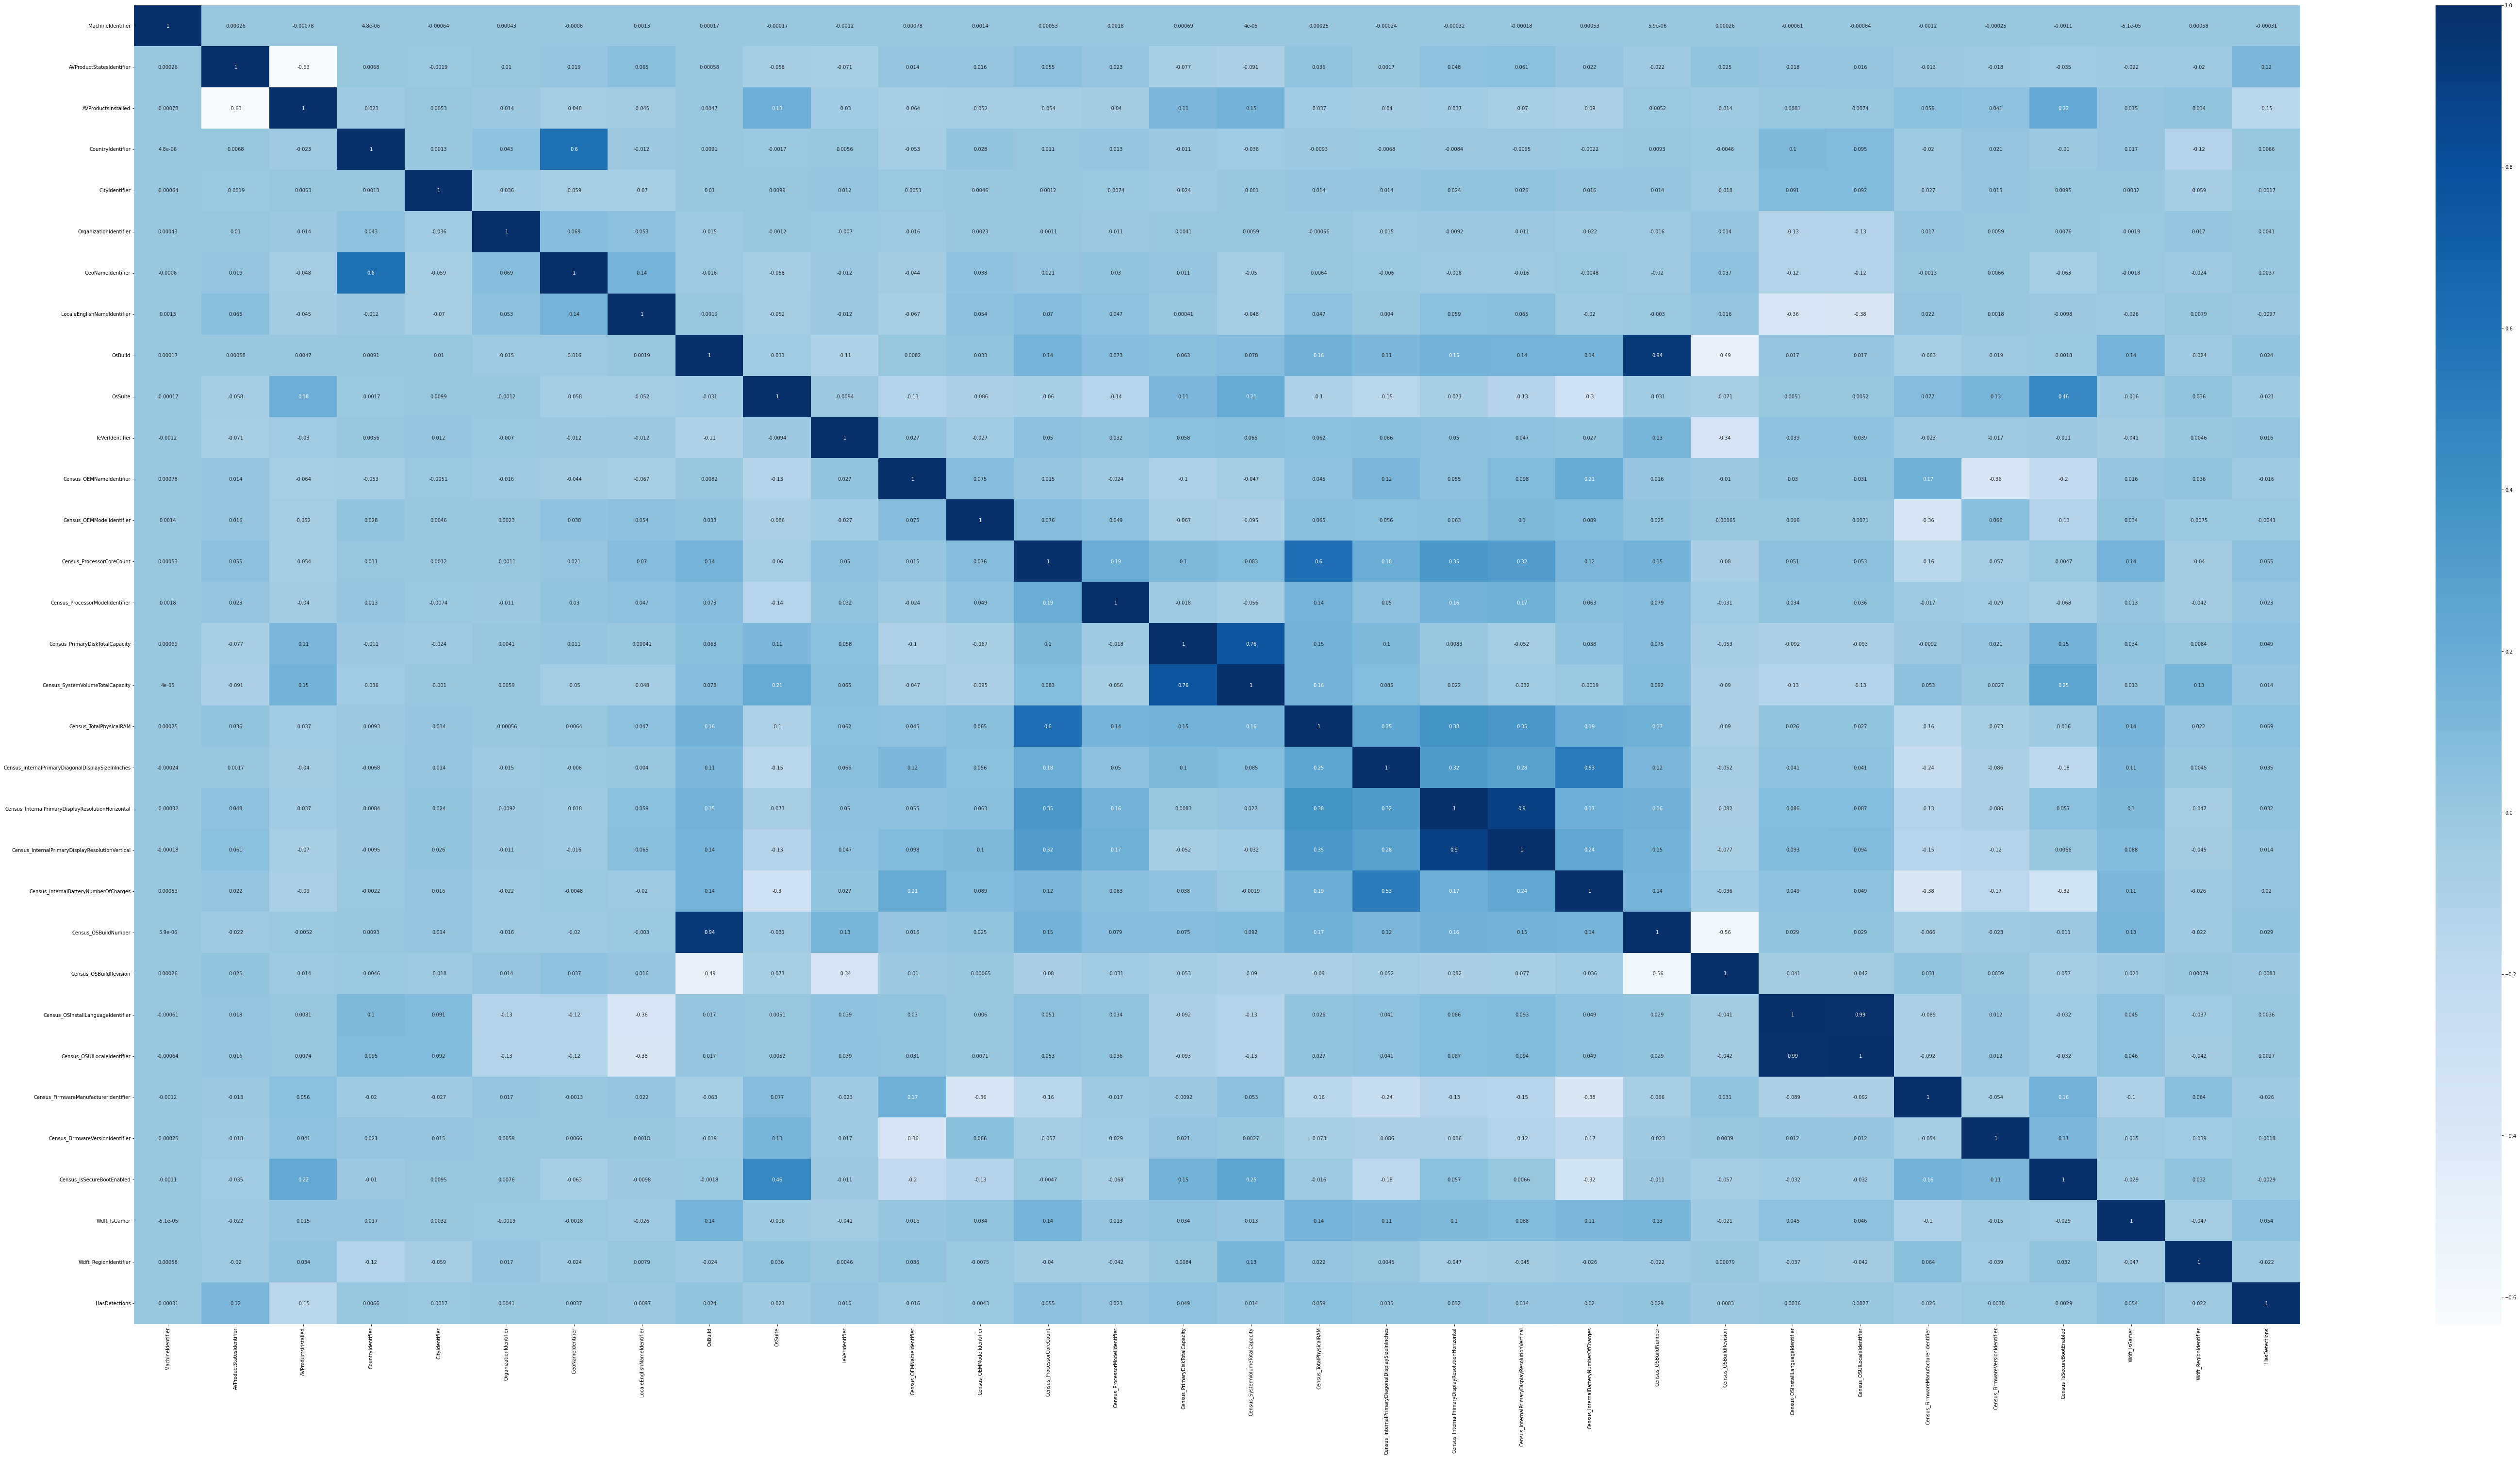

In [21]:
plt.figure(figsize=(100,50))
cor = df.corr()
sns.heatmap(cor, cmap="Blues", annot=True)
plt.show()

In [22]:
# firstly the OsBuild and and censusOSbuildNumber has hight corr with otne other(0.94)
# going to keep censusOSbuildNumber and droping OsBuild
#similarly Census_OSInstallLanguageIdentifier and Census_OSUILocaleIdentifier
# Census_InternalPrimaryDisplayResolutionVertical and Census_InternalPrimaryDisplayResolutionHorizontal



df.drop(columns=["OsBuild","Census_OSInstallLanguageIdentifier","Census_InternalPrimaryDisplayResolutionVertical"],inplace=True)
xtest.drop(columns=["OsBuild","Census_OSInstallLanguageIdentifier","Census_InternalPrimaryDisplayResolutionVertical"],inplace=True)


## Categorical Data

SmartScreen

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

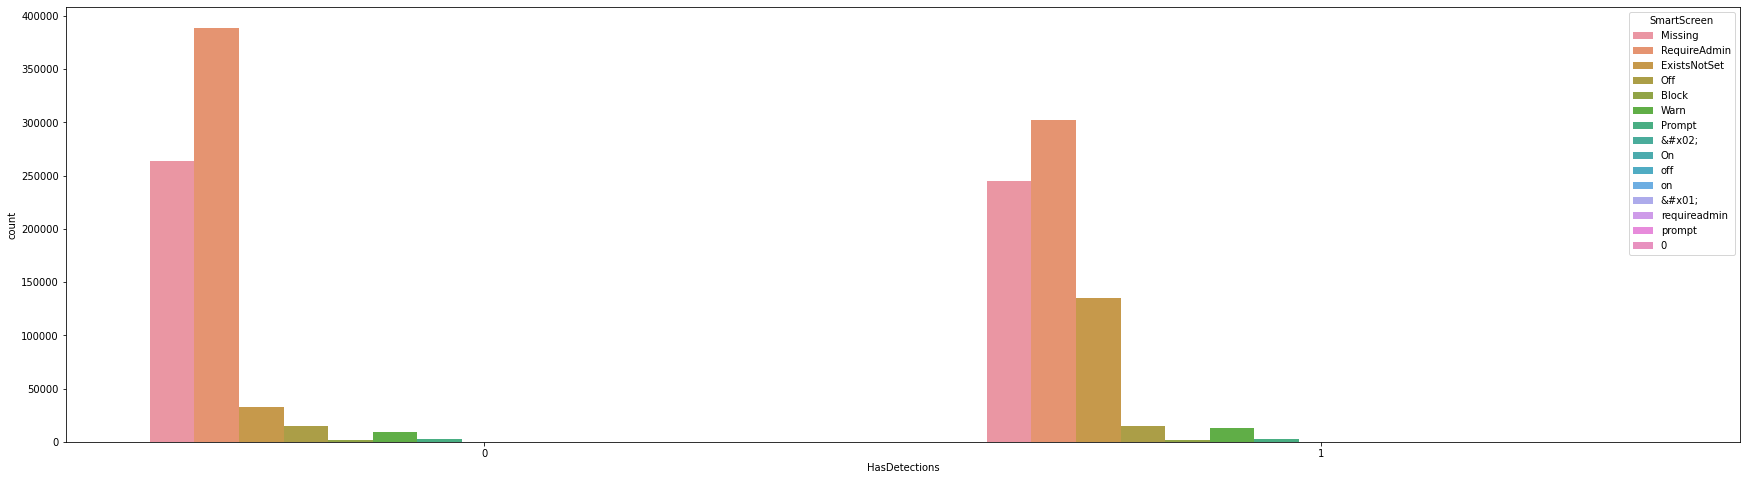

In [24]:
fig, ax = plt.subplots(figsize=(30, 8))
sns.countplot(x="HasDetections",hue="SmartScreen",data=df.fillna("Missing"))

In [25]:
df["SmartScreen"]=df["SmartScreen"].replace("off","Off")
xtest["SmartScreen"]=xtest["SmartScreen"].replace("off","Off")

In [26]:
df["SmartScreen"]=df["SmartScreen"].replace("prompt","Prompt")
xtest["SmartScreen"]=xtest["SmartScreen"].replace("prompt","Prompt")

In [27]:
df["SmartScreen"]=df["SmartScreen"].replace("requireadmin","RequireAdmin")
xtest["SmartScreen"]=xtest["SmartScreen"].replace("requireadmin","RequireAdmin")

In [28]:
df["SmartScreen"]=df["SmartScreen"].replace(["&#x02;","&#x01;","0"],"other")
xtest["SmartScreen"]=xtest["SmartScreen"].replace(["&#x02;","&#x01;","0"],"other")

In [29]:
df["SmartScreen"]=df["SmartScreen"].replace("on","On")
xtest["SmartScreen"]=xtest["SmartScreen"].replace("on","On")

In [30]:
df["SmartScreen"].value_counts(dropna=False)

RequireAdmin    691019
NaN             508245
ExistsNotSet    166870
Off              30044
Warn             21782
Prompt            5570
Block             3643
On                 137
other              127
Name: SmartScreen, dtype: int64

In [31]:
# as there is a considerate ammount of missing values,better to make a new category
df["SmartScreen"].fillna("missing",inplace=True)
xtest["SmartScreen"].fillna("missing",inplace=True)


Census_PrimaryDiskTypeName

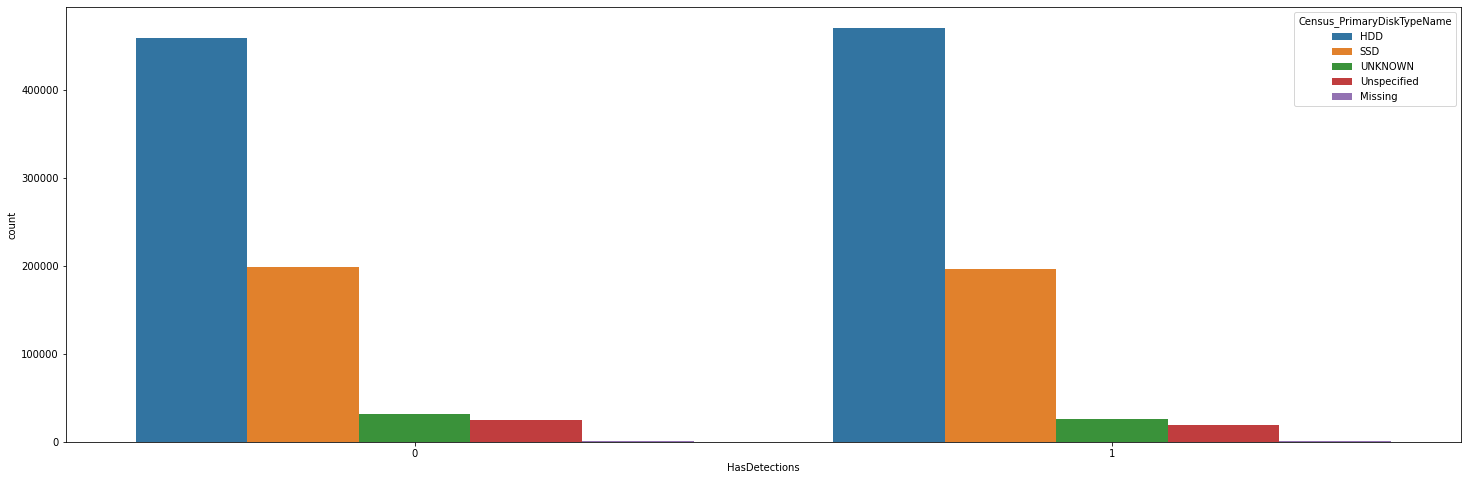

In [32]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.countplot(x="HasDetections",hue="Census_PrimaryDiskTypeName",data=df.fillna("Missing"))

In [33]:
df["Census_PrimaryDiskTypeName"]=df["Census_PrimaryDiskTypeName"].replace(["UNKNOWN","Unspecified"],"unknown")
xtest["Census_PrimaryDiskTypeName"]=xtest["Census_PrimaryDiskTypeName"].replace(["UNKNOWN","Unspecified"],"unknown")

In [34]:
df["Census_PrimaryDiskTypeName"].value_counts(dropna=False)

HDD        929549
SSD        394650
unknown    101161
NaN          2077
Name: Census_PrimaryDiskTypeName, dtype: int64

In [35]:
# as the missing values are not that much,going with the idea that this dataset is supposed to be collected some years ago...so HDD would be more common-----also the mode is HDD
# the detections are almost balanced in all types of disks

In [36]:
df["Census_PrimaryDiskTypeName"].fillna("HDD",inplace=True)
df["Census_PrimaryDiskTypeName"].fillna("HDD",inplace=True)

**Census_ChassisTypeName**

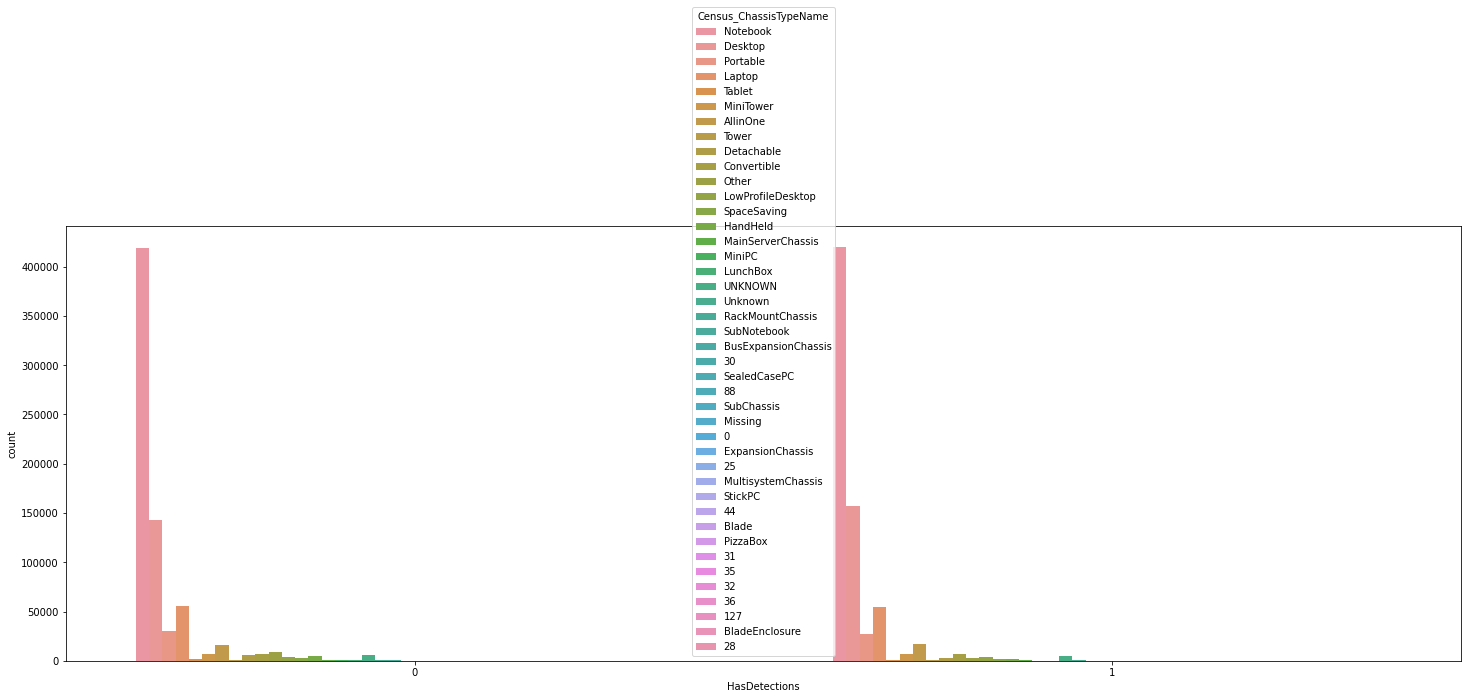

In [37]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.countplot(x="HasDetections",hue="Census_ChassisTypeName",data=df.fillna("Missing"))

In [38]:
df["Census_ChassisTypeName"].value_counts()

Notebook               839484
Desktop                299866
Laptop                 109608
Portable                57757
AllinOne                32549
MiniTower               13725
Convertible             13555
Other                   12268
UNKNOWN                 10774
Detachable               8132
LowProfileDesktop        7983
HandHeld                 7397
SpaceSaving              4615
Tablet                   2192
Tower                    2016
Unknown                  1576
MainServerChassis        1530
MiniPC                    713
LunchBox                  647
RackMountChassis          542
BusExpansionChassis       134
SubNotebook               122
30                         48
0                          24
StickPC                    20
PizzaBox                   11
SealedCasePC               10
MultisystemChassis          8
Blade                       7
35                          7
ExpansionChassis            5
88                          2
SubChassis                  2
36        

In [39]:
df["Census_ChassisTypeName"]=df["Census_ChassisTypeName"].replace(["Laptop","Portable","Detachable","SubNotebook"],"Notebook")
xtest["Census_ChassisTypeName"]=xtest["Census_ChassisTypeName"].replace(["Laptop","Portable","Detachable","SubNotebook"],"Notebook")



df["Census_ChassisTypeName"]=df["Census_ChassisTypeName"].replace(["AllinOne","LowProfileDesktop","LowProfileDesktop","MiniPC"],"Desktop")
xtest["Census_ChassisTypeName"]=xtest["Census_ChassisTypeName"].replace(["AllinOne","LowProfileDesktop","LowProfileDesktop","MiniPC"],"Desktop")

df["Census_ChassisTypeName"]=df["Census_ChassisTypeName"].replace(["HandHeld"],"Tablet")
xtest["Census_ChassisTypeName"]=xtest["Census_ChassisTypeName"].replace(["HandHeld"],"Tablet")


df["Census_ChassisTypeName"]=df["Census_ChassisTypeName"].replace(["Tower"],"MiniTower")
xtest["Census_ChassisTypeName"]=xtest["Census_ChassisTypeName"].replace(["Tower"],"MiniTower")

df["Census_ChassisTypeName"]=df["Census_ChassisTypeName"].replace(["UNKNOWN"],"Unknown")
xtest["Census_ChassisTypeName"]=xtest["Census_ChassisTypeName"].replace(["UNKNOWN"],"Unknown")



             

In [40]:
cats=["Notebook","Desktop","MiniTower","Tablet","Convertible"];
oth=[x for x in df["Census_ChassisTypeName"].unique() if x not in cats]
oth=[x for x in oth if str(x)!="nan"]
df["Census_ChassisTypeName"]=df["Census_ChassisTypeName"].replace(oth,"Other")
xtest["Census_ChassisTypeName"]=xtest["Census_ChassisTypeName"].replace(oth,"Other")
del(oth)

In [41]:
df["Census_ChassisTypeName"].value_counts(dropna=False)

Notebook       1015103
Desktop         341111
Other            32238
MiniTower        15741
Convertible      13555
Tablet            9589
NaN                100
Name: Census_ChassisTypeName, dtype: int64

In [42]:
df["Census_ChassisTypeName"].fillna(df["Census_ChassisTypeName"].mode()[0],inplace=True)

Census_PowerPlatformRoleName

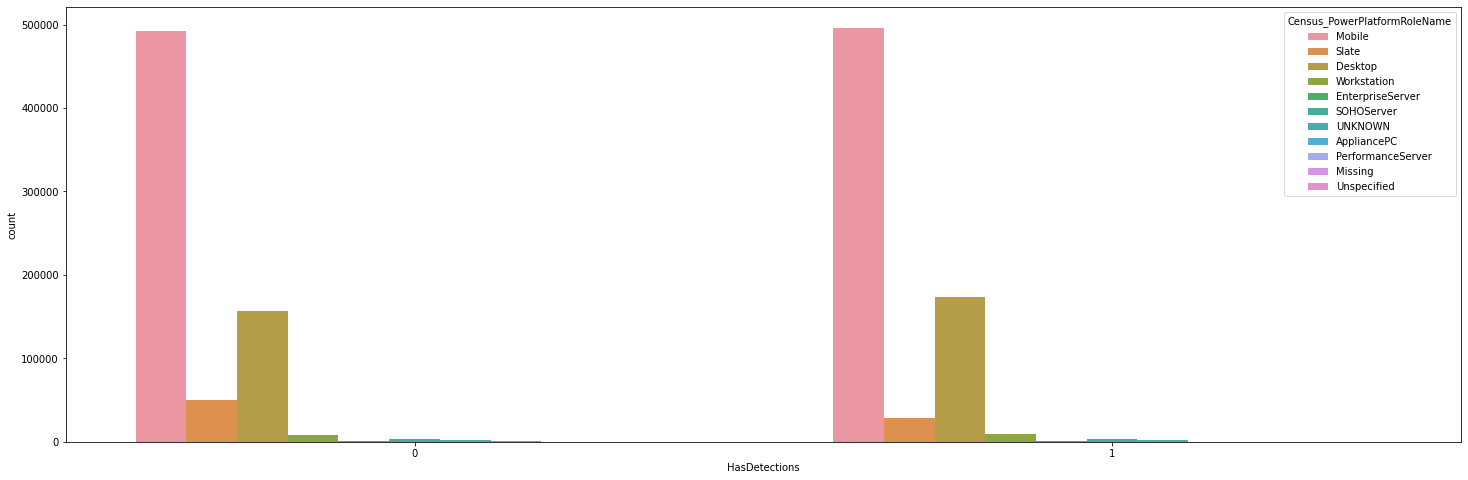

In [43]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.countplot(x="HasDetections",hue="Census_PowerPlatformRoleName",data=df.fillna("Missing"))

In [44]:
df["Census_PowerPlatformRoleName"].value_counts(dropna=False)

Mobile               988718
Desktop              330592
Slate                 79123
Workstation           17823
SOHOServer             6036
UNKNOWN                3335
EnterpriseServer       1139
AppliancePC             644
PerformanceServer        16
NaN                      10
Unspecified               1
Name: Census_PowerPlatformRoleName, dtype: int64

In [51]:
cat=["Mobile","Desktop","Slate","Workstation"]
oth=[]
oth=[x for x in df["Census_PowerPlatformRoleName"].unique() if x not in cat]
oth=[x for x in oth if str(x)!="nan"]
df["Census_PowerPlatformRoleName"].replace(oth,"others")       

In [ ]:
df["Census_PowerPlatformRoleName"].value_counts(dropna=False)

In [ ]:
df["Census_PowerPlatformRoleName"].isna().sum()

10

In [ ]:
# only 10 na values
# therefore filling with ffill
df["Census_PowerPlatformRoleName"].fillna(method="ffill",limit=3,inplace=True)
xtest["Census_PowerPlatformRoleName"].fillna(method="ffill",limit=3,inplace=True)

In [ ]:
print(df["Census_PowerPlatformRoleName"].isna().sum())
print(xtest["Census_PowerPlatformRoleName"].isna().sum())





0
0


In [ ]:
df["OsBuildLab"].value_counts(dropna=False)

17134.1.amd64fre.rs4_release.180410-1804                     584858
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908        200554
16299.15.amd64fre.rs3_release.170928-1534                    154078
15063.0.amd64fre.rs2_release.170317-1834                     114569
17134.1.x86fre.rs4_release.180410-1804                        41241
16299.15.x86fre.rs3_release.170928-1534                       37470
14393.2189.amd64fre.rs1_release.180329-1711                   30992
10240.17443.amd64fre.th1.170602-2340                          27663
10586.1176.amd64fre.th2_release_sec.170913-1848               23970
15063.0.x86fre.rs2_release.170317-1834                        10003
14393.0.amd64fre.rs1_release.160715-1616                       9382
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800            9028
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033            8931
16299.637.amd64fre.rs3_release_svc.180808-1748                 7191
14393.2189.x86fre.rs1_release.180329-1711       

In [ ]:
# df.groupby("OsBuildLab",dropna=False)["HasDetections"].value_counts()

In [ ]:
# 17134.1.amd64fre.rs4_release.180410-1804                     584858
# 16299.431.amd64fre.rs3_release_svc_escrow.180502-1908        200554
# 16299.15.amd64fre.rs3_release.170928-1534                    154078
# 15063.0.amd64fre.rs2_release.170317-1834                     114569
print(pd.Series(le.fit_transform(df["OsBuildLab"].fillna("17134.1.amd64fre.rs4_release.180410-1804"))).corr(df["HasDetections"]))
print(pd.Series(le.fit_transform(df["OsBuildLab"].fillna("16299.431.amd64fre.rs3_release_svc_escrow.180502-1908"))).corr(df["HasDetections"]))
print(pd.Series(le.fit_transform(df["OsBuildLab"].fillna("16299.15.amd64fre.rs3_release.170928-1534"))).corr(df["HasDetections"]))
print(pd.Series(le.fit_transform(df["OsBuildLab"].fillna("15063.0.amd64fre.rs2_release.170317-1834"))).corr(df["HasDetections"]))
print(pd.Series(le.fit_transform(df["OsBuildLab"].fillna("17134.1.x86fre.rs4_release.180410-1804"))).corr(df["HasDetections"]))


0.017423601157316608
0.017423518920070782
0.017423477478637223
0.017423446256333373
0.017423621582122514


In [ ]:
df["OsBuildLab"].fillna("17134.1.amd64fre.rs4_release.180410-1804",inplace=True)
xtest["OsBuildLab"].fillna("17134.1.amd64fre.rs4_release.180410-1804",inplace=True)

#NUMERIC DATA

In [ ]:
# for now ,we followed the strategy:
# if distribution is uniform:::replace nan by median
# if distribution is skewed:::: replace by mode

In [ ]:
# df.groupby("Census_IsWIMBootEnabled",dropna=False)["HasDetections"].value_counts()
# # uniformly distributed detections
# # null values are large

In [ ]:
# df.drop(columns="Census_IsWIMBootEnabled",inplace=True)
# xtest.drop(columns="Census_IsWIMBootEnabled",inplace=True)

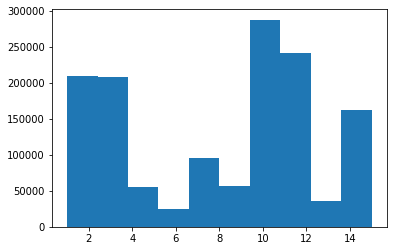

In [ ]:
plt.hist(df['Wdft_RegionIdentifier'])
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


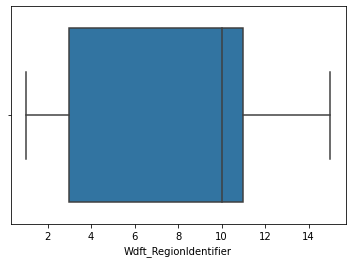

In [ ]:
sns.boxplot(df['Wdft_RegionIdentifier']);

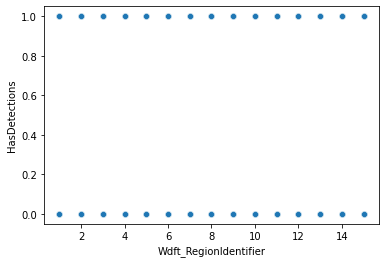

In [ ]:

sns.scatterplot(x="Wdft_RegionIdentifier", y="HasDetections", data=df);

In [ ]:
df["Wdft_RegionIdentifier"].fillna(df["Wdft_RegionIdentifier"].median(),inplace=True)
xtest["Wdft_RegionIdentifier"].fillna(df["Wdft_RegionIdentifier"].median(),inplace=True)

In [ ]:
df["Wdft_RegionIdentifier"].corr(df["HasDetections"])

-0.02114907333365064

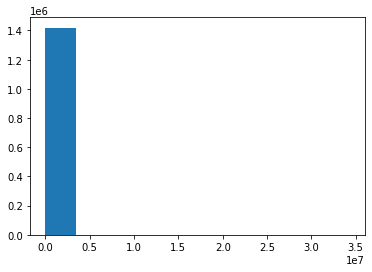

In [ ]:
plt.hist(df['Census_SystemVolumeTotalCapacity'])
plt.show() 


In [ ]:
df['Census_SystemVolumeTotalCapacity'].corr(df["HasDetections"])

0.013978849395953499

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


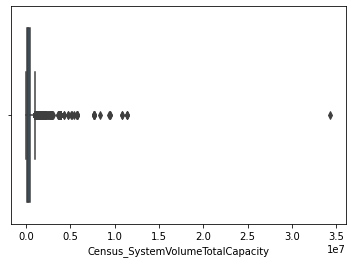

In [ ]:
sns.boxplot(df['Census_SystemVolumeTotalCapacity']);

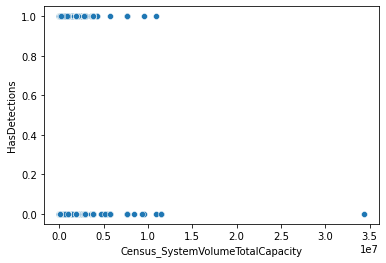

In [ ]:
sns.scatterplot(x="Census_SystemVolumeTotalCapacity", y="HasDetections", data=df);

In [ ]:
df['Census_SystemVolumeTotalCapacity'].fillna(df['Census_SystemVolumeTotalCapacity'].mode()[0],inplace=True)
xtest['Census_SystemVolumeTotalCapacity'].fillna(df['Census_SystemVolumeTotalCapacity'].mode()[0],inplace=True)


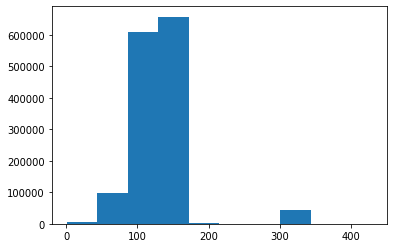

In [ ]:
plt.hist(df['IeVerIdentifier'])
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


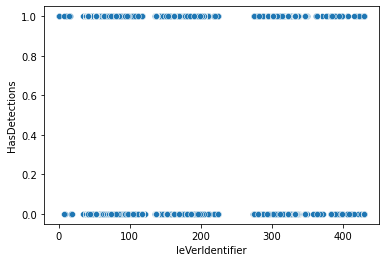

In [ ]:
sns.scatterplot(df["IeVerIdentifier"], df["HasDetections"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


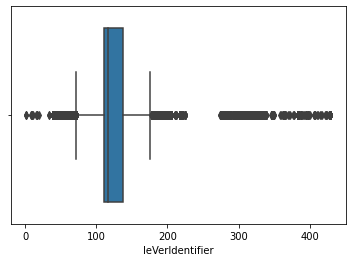

In [ ]:
sns.boxplot(df["IeVerIdentifier"])

In [ ]:
df['IeVerIdentifier'].fillna(df['IeVerIdentifier'].mode()[0],inplace=True)
xtest['IeVerIdentifier'].fillna(df['IeVerIdentifier'].mode()[0],inplace=True)

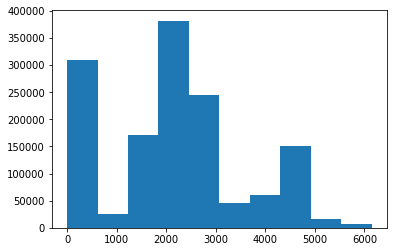

In [ ]:
plt.hist(df['Census_OEMNameIdentifier'])
plt.show() 

In [ ]:
df['Census_OEMNameIdentifier'].fillna(df['Census_OEMNameIdentifier'].median(),inplace=True)
xtest['Census_OEMNameIdentifier'].fillna(df['Census_OEMNameIdentifier'].median(),inplace=True)

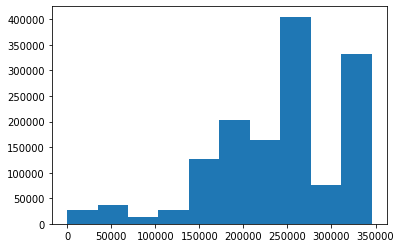

In [ ]:
plt.hist(df['Census_OEMModelIdentifier'])
plt.show() 

In [ ]:
df['Census_OEMModelIdentifier'].fillna(df['Census_OEMModelIdentifier'].median(),inplace=True)
xtest['Census_OEMModelIdentifier'].fillna(df['Census_OEMModelIdentifier'].median(),inplace=True)

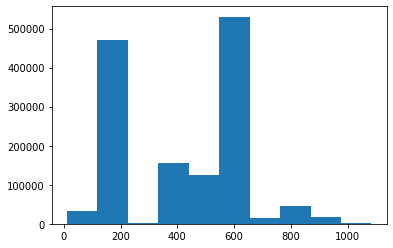

In [ ]:
plt.hist(df['Census_FirmwareManufacturerIdentifier'])
plt.show() 

In [ ]:
df['Census_FirmwareManufacturerIdentifier'].fillna(df['Census_FirmwareManufacturerIdentifier'].median(),inplace=True)
xtest['Census_FirmwareManufacturerIdentifier'].fillna(df['Census_FirmwareManufacturerIdentifier'].median(),inplace=True)

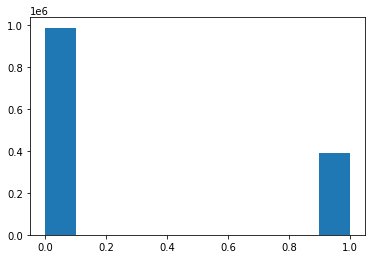

In [ ]:
plt.hist(df['Wdft_IsGamer'])
plt.show() 

In [ ]:
df['Wdft_IsGamer'].fillna(df['Wdft_IsGamer'].mode()[0],inplace=True)
xtest['Wdft_IsGamer'].fillna(df['Wdft_IsGamer'].mode()[0],inplace=True)

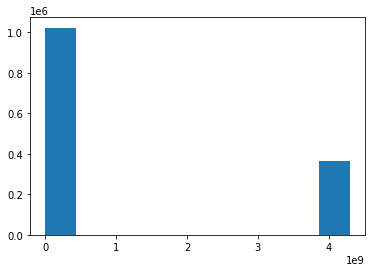

In [ ]:
plt.hist(df['Census_InternalBatteryNumberOfCharges'])
plt.show()

In [ ]:
df['Census_InternalBatteryNumberOfCharges'].fillna(df['Census_InternalBatteryNumberOfCharges'].mode()[0],inplace=True)
xtest['Census_InternalBatteryNumberOfCharges'].fillna(df['Census_InternalBatteryNumberOfCharges'].mode()[0],inplace=True)

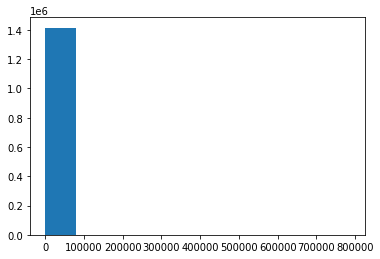

In [ ]:
plt.hist(df['Census_TotalPhysicalRAM'])
plt.show()

In [ ]:
df['Census_TotalPhysicalRAM'].fillna(df['Census_TotalPhysicalRAM'].mode()[0],inplace=True)
xtest['Census_TotalPhysicalRAM'].fillna(df['Census_TotalPhysicalRAM'].mode()[0],inplace=True)

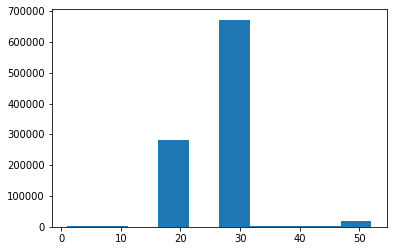

In [ ]:
plt.hist(df['OrganizationIdentifier'])
plt.show() 

In [ ]:
df['OrganizationIdentifier'].fillna(df['OrganizationIdentifier'].mode()[0],inplace=True)
xtest['OrganizationIdentifier'].fillna(df['OrganizationIdentifier'].mode()[0],inplace=True)

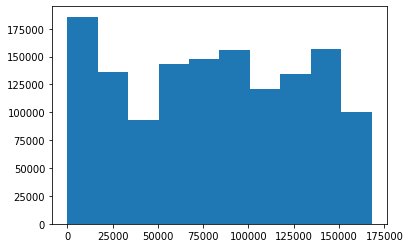

In [ ]:
plt.hist(df['CityIdentifier'])
plt.show() 

In [ ]:
df['CityIdentifier'].fillna(df['CityIdentifier'].median(),inplace=True)
xtest['CityIdentifier'].fillna(df['CityIdentifier'].median(),inplace=True)

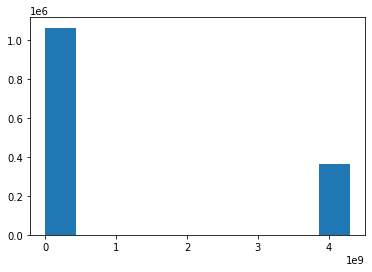

In [ ]:
plt.hist(df['Census_InternalBatteryNumberOfCharges'])
plt.show()

In [ ]:
df['Census_InternalBatteryNumberOfCharges'].fillna(df['Census_InternalBatteryNumberOfCharges'].mode()[0],inplace=True)
xtest['Census_InternalBatteryNumberOfCharges'].fillna(df['Census_InternalBatteryNumberOfCharges'].mode()[0],inplace=True)

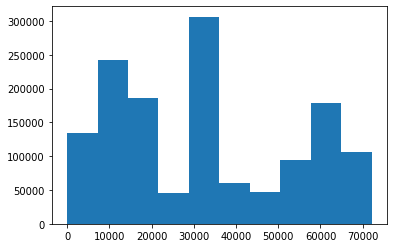

In [ ]:
plt.hist(df['Census_FirmwareVersionIdentifier'])
plt.show() 

In [ ]:
df['Census_FirmwareVersionIdentifier'].fillna(df['Census_FirmwareVersionIdentifier'].median(),inplace=True)
xtest['Census_FirmwareVersionIdentifier'].fillna(df['Census_FirmwareVersionIdentifier'].median(),inplace=True)

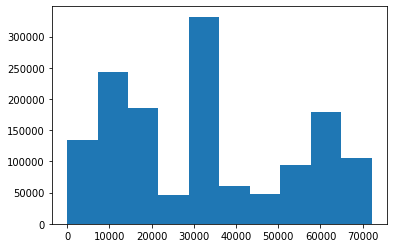

In [ ]:
plt.hist(df['Census_FirmwareVersionIdentifier'])
plt.show()

In [ ]:
df['Census_FirmwareVersionIdentifier'].fillna(df['Census_FirmwareVersionIdentifier'].median(),inplace=True)
xtest['Census_FirmwareVersionIdentifier'].fillna(df['Census_FirmwareVersionIdentifier'].median(),inplace=True)

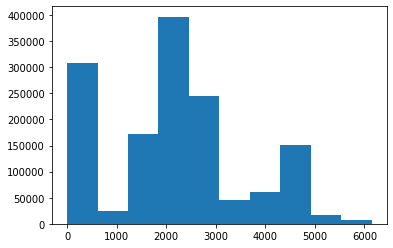

In [ ]:
plt.hist(df['Census_OEMNameIdentifier'])
plt.show() 

In [ ]:
df['Census_OEMNameIdentifier'].fillna(df['Census_OEMNameIdentifier'].median(),inplace=True)
xtest['Census_OEMNameIdentifier'].fillna(df['Census_OEMNameIdentifier'].median(),inplace=True)

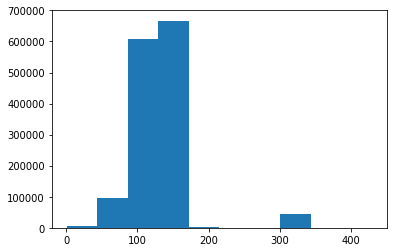

In [ ]:
plt.hist(df['IeVerIdentifier'])
plt.show() 

In [ ]:
df['IeVerIdentifier'].fillna(df['IeVerIdentifier'].mode()[0],inplace=True)
xtest['IeVerIdentifier'].fillna(df['IeVerIdentifier'].mode()[0],inplace=True)

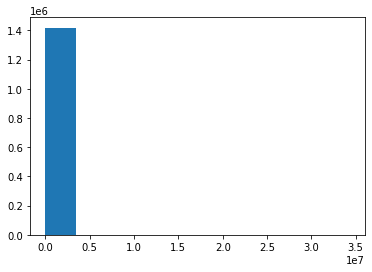

In [ ]:
plt.hist(df['Census_PrimaryDiskTotalCapacity'])
plt.show()

In [ ]:
df['Census_PrimaryDiskTotalCapacity'].fillna(df['Census_PrimaryDiskTotalCapacity'].mode()[0],inplace=True)
xtest['Census_PrimaryDiskTotalCapacity'].fillna(df['Census_PrimaryDiskTotalCapacity'].mode()[0],inplace=True)



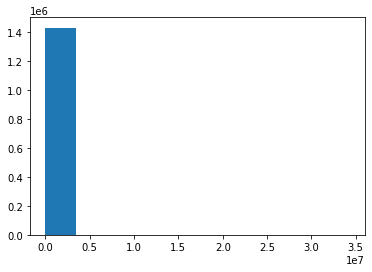

In [ ]:
plt.hist(df['Census_SystemVolumeTotalCapacity'])
plt.show() 

In [ ]:
df['Census_SystemVolumeTotalCapacity'].fillna(df['Census_SystemVolumeTotalCapacity'].mode()[0],inplace=True)
xtest['Census_SystemVolumeTotalCapacity'].fillna(df['Census_SystemVolumeTotalCapacity'].mode()[0],inplace=True)


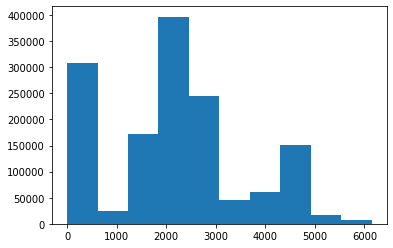

In [ ]:
plt.hist(df['Census_OEMNameIdentifier'])
plt.show() 

In [ ]:
df['Census_OEMNameIdentifier'].fillna(df['Census_OEMNameIdentifier'].median(),inplace=True)
xtest['Census_SystemVolumeTotalCapacity'].fillna(df['Census_SystemVolumeTotalCapacity'].mode()[0],inplace=True)


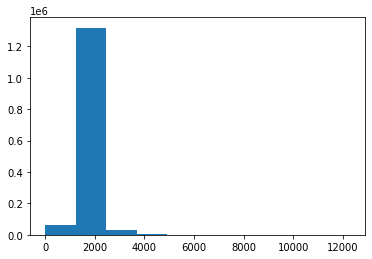

In [ ]:
plt.hist(df['Census_InternalPrimaryDisplayResolutionHorizontal'])
plt.show()

In [ ]:
df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].fillna(df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].mode()[0],inplace=True)
xtest['Census_InternalPrimaryDiagonalDisplaySizeInInches'].fillna(df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].mode()[0],inplace=True)

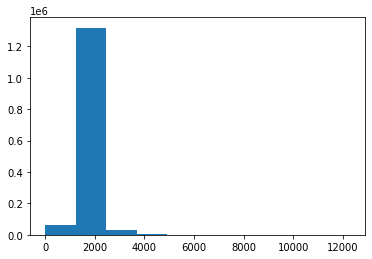

In [ ]:
plt.hist(df['Census_InternalPrimaryDisplayResolutionHorizontal'])
plt.show() 

In [ ]:
df['Census_InternalPrimaryDisplayResolutionHorizontal'].fillna(df['Census_InternalPrimaryDisplayResolutionHorizontal'].mode()[0],inplace=True)
xtest['Census_InternalPrimaryDisplayResolutionHorizontal'].fillna(df['Census_InternalPrimaryDisplayResolutionHorizontal'].mode()[0],inplace=True)

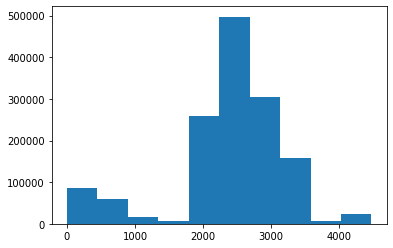

In [ ]:
plt.hist(df['Census_ProcessorModelIdentifier'])
plt.show() 

In [ ]:
df['Census_ProcessorModelIdentifier'].fillna(df['Census_ProcessorModelIdentifier'].median(),inplace=True)
xtest['Census_ProcessorModelIdentifier'].fillna(df['Census_ProcessorModelIdentifier'].median(),inplace=True)

In [ ]:
# plt.hist(df['Census_ProcessorManufacturerIdentifier'])
# plt.show() 

In [ ]:
# df['Census_ProcessorManufacturerIdentifier'].fillna(df['Census_ProcessorManufacturerIdentifier'].mode()[0],inplace=True)
# xtest['Census_ProcessorManufacturerIdentifier'].fillna(df['Census_ProcessorManufacturerIdentifier'].mode()[0],inplace=True)

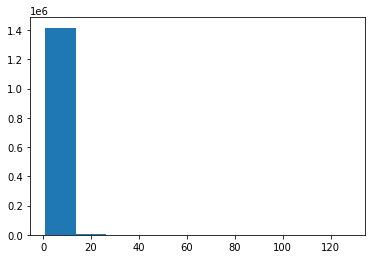

In [ ]:
plt.hist(df['Census_ProcessorCoreCount'])
plt.show()

In [ ]:
df['Census_ProcessorCoreCount'].fillna(df['Census_ProcessorCoreCount'].mode()[0],inplace=True)
xtest['Census_ProcessorCoreCount'].fillna(df['Census_ProcessorCoreCount'].mode()[0],inplace=True)



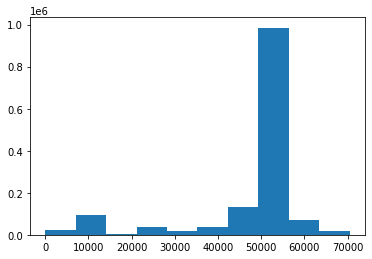

In [ ]:
plt.hist(df['AVProductStatesIdentifier'])
plt.show() 

In [ ]:
df['AVProductStatesIdentifier'].fillna(df['AVProductStatesIdentifier'].mode()[0],inplace=True)
xtest['AVProductStatesIdentifier'].fillna(df['AVProductStatesIdentifier'].mode()[0],inplace=True)

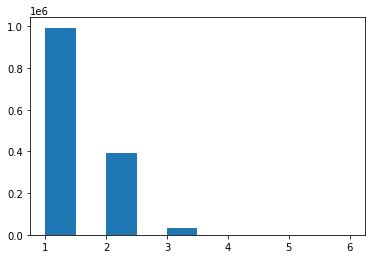

In [ ]:
plt.hist(df['AVProductsInstalled'])
plt.show() 

In [ ]:
df['AVProductsInstalled'].fillna(df['AVProductsInstalled'].mode()[0],inplace=True)
xtest['AVProductsInstalled'].fillna(df['AVProductsInstalled'].mode()[0],inplace=True)

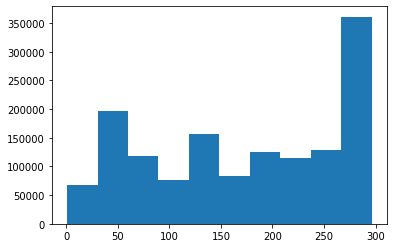

In [ ]:
plt.hist(df['GeoNameIdentifier'])
plt.show() 

In [ ]:
df['GeoNameIdentifier'].fillna(df['GeoNameIdentifier'].median(),inplace=True)
xtest['GeoNameIdentifier'].fillna(df['GeoNameIdentifier'].median(),inplace=True)

In [ ]:
columns=[]
for col in df.columns:
  columns.append(col)

In [ ]:
#  encodng


In [ ]:
dfm1=df

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df2=df.select_dtypes(include='object')

In [ ]:
for col in df2.columns:
     dfm1[col]=le.fit_transform(dfm1[col])

In [ ]:
cor={}
for col in columns:
  cor[col]=abs(dfm1[col].corr(dfm1["HasDetections"]))
   

KeyError: ignored

In [ ]:
print(cor)

{'MachineIdentifier': 0.0003143868302951086, 'EngineVersion': 0.052607996825299194, 'AppVersion': 0.027108625192954285, 'AvSigVersion': 0.05416673178969641, 'AVProductStatesIdentifier': 0.11542845902556569, 'AVProductsInstalled': 0.14848243858839746, 'CountryIdentifier': 0.0066165978292573365, 'CityIdentifier': 0.0016509824375736512, 'OrganizationIdentifier': 0.0026981502029821964, 'GeoNameIdentifier': 0.0036763970838524923, 'LocaleEnglishNameIdentifier': 0.009744829414533192, 'OsSuite': 0.021169417005050768, 'OsPlatformSubRelease': 0.01811511919217755, 'OsBuildLab': 0.017423601157316608, 'SkuEdition': 0.018071649621153728, 'IeVerIdentifier': 0.015779265296372757, 'SmartScreen': 0.20809152124307045, 'Census_MDC2FormFactor': 0.011090988342815003, 'Census_OEMNameIdentifier': 0.015979639798899162, 'Census_OEMModelIdentifier': 0.004284312011129005, 'Census_ProcessorCoreCount': 0.05487246694906308, 'Census_ProcessorModelIdentifier': 0.023288130337193277, 'Census_PrimaryDiskTotalCapacity': 0

In [ ]:
lowcor=[]
for key in cor.keys():
  if cor[key]<0.001:
    lowcor.append(key)

In [ ]:
lowcor

['MachineIdentifier',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_OSBuildRevision',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_FirmwareVersionIdentifier',
 'Census_IsSecureBootEnabled']

In [ ]:
lowcor.remove("MachineIdentifier")

In [ ]:
for x in lowcor:
  dfm1.drop(columns=[x],inplace=True)
  xtest.drop(columns=[x],inplace=True)
xtest.shape

(356860, 35)

In [ ]:
### from now :we would start analysing correlation and set a threshold and drop columns with low correlation than the threshold

In [ ]:

# ypred=clf.predict(xtest)

In [ ]:
# yp=pd.DataFrame()
# yp.insert(0,"Expected",ypred)
# yp.insert(0,"Id",xtest["MachineIdentifier"])

In [ ]:
# yp.head(5)

In [ ]:
# yp.to_csv("out.csv")

In [ ]:
# import xgboost as xgb
# model = xgb.XGBClassifier()
# model.fit(dfm1, ytrain)

In [ ]:
# model.score(X, y)

In [ ]:
# ypred=clf.predict(xtest)


In [ ]:
# yp=pd.DataFrame()
# yp.insert(0,"Expected",ypred)
# yp.insert(0,"Id",xtest["MachineIdentifier"])

In [ ]:
# yp.to_csv("out1.csv")

In [ ]:
# dfm1.to_csv("df_num_mode")

In [ ]:
dfm1.shape

(1427437, 36)

In [ ]:
# X=dfm1
# y=ytrain
# import xgboost as xgb
# model = xgb.XGBClassifier()
# model.fit(X, y)
# model.score(X,y

In [ ]:
# from sklearn.ensemble import HistGradientBoostingClassifier
# X=dfm1
# y=ytrain
# clf = HistGradientBoostingClassifier().fit(X, y)
# clf.score(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import xgboost as xgb


In [ ]:
X=dfm1.drop(columns=["HasDetections"])
y=dfm1["HasDetections"]

In [ ]:
from imblearn.over_sampling import RandomOverSampler 

In [ ]:
X_train, xvalid, y_train, yvalid = train_test_split(X, y, test_size=0.30, random_state=6, stratify=y)

X_train.shape, xvalid.shape, y_train.shape, yvalid.shape

((999205, 35), (428232, 35), (999205,), (428232,))

In [ ]:
osampler = RandomOverSampler(sampling_strategy=1,random_state =2)

xt, yt = osampler.fit_resample(X_train, y_train)

In [ ]:
xt.shape

(999618, 35)

In [ ]:
le=LabelEncoder()
xt=xtest.select_dtypes(include='object')
for col in xt.columns:
     xtest[col]=le.fit_transform(xtest[col])

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

In [ ]:

params = {'num_leaves': 300,
         'min_data_in_leaf': 42,
         'objective': 'binary',
         'max_depth': 10,
         'learning_rate': 0.05,
         "boosting": "gbdt",
         "feature_fraction": 0.8,
         "bagging_freq": 5,
         "bagging_fraction": 0.8,
         "bagging_seed": 11,
         "lambda_l1": 0.2,
         "lambda_l2": 2,
         "random_state": 42,          
         "verbosity": 100}
clf.set_params(**params)

LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, bagging_seed=11,
               boosting='gbdt', feature_fraction=0.8, lambda_l1=0.2,
               lambda_l2=2, learning_rate=0.05, max_depth=10,
               min_data_in_leaf=42, num_leaves=300, objective='binary',
               random_state=42, verbosity=100)

In [ ]:
# xt.dtypes

In [ ]:
clf.fit(xt,yt,
        eval_set=[(xt, yt), (xvalid, yvalid)],
        early_stopping_rounds=100, 
        verbose=100)
# eval_matrics=logloss by def


Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.608406	valid_1's binary_logloss: 0.616334
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.608406	valid_1's binary_logloss: 0.616334


LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, bagging_seed=11,
               boosting='gbdt', feature_fraction=0.8, lambda_l1=0.2,
               lambda_l2=2, learning_rate=0.05, max_depth=10,
               min_data_in_leaf=42, num_leaves=300, objective='binary',
               random_state=42, verbosity=100)

In [ ]:
ypred=clf.predict(xtest)

In [ ]:
ytestp=pd.DataFrame()

ytestp.insert(0,"Id",xtest["MachineIdentifier"])
ytestp.insert(1,"Expected",ypred)

In [ ]:
# ytestp.head(20)
ytestp.to_csv("out6.csv",index=False)

In [ ]:
# (learning_rate=0.1, 
#                             n_estimators=3000, 
#                             max_depth=11,
#                             min_child_weight=9,
#                             gamma=0.2,
#                             subsample=1,
#                             colsample_bytree=0.4,
#                             objective= 'binary:logistic',
#                             nthread=-1,
#                             scale_pos_weight=1,
#                             reg_alpha = 0.6,
#                             reg_lambda = 3,
#                             seed=42)

In [ ]:
clf_xgb = xgb.XGBClassifier(learning_rate=0.05, 
                            n_estimators=1800, 
                            max_depth=11,
                            min_child_weight=5,
                            gamma=0.1,
                            subsample=0.9,
                            colsample_bytree=0.6,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.2,
                            reg_lambda = 3,
                            seed=42)

In [ ]:
clf_xgb.fit(xt, yt, eval_set=[(xt, yt), (xvalid, yvalid)],
early_stopping_rounds=100, eval_metric='auc', verbose=100)
predictions = clf_xgb.predict(xvalid)

[0]	validation_0-auc:0.688842	validation_1-auc:0.680299
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.744338	validation_1-auc:0.71447
[200]	validation_0-auc:0.761831	validation_1-auc:0.718294
[300]	validation_0-auc:0.773879	validation_1-auc:0.71977
[400]	validation_0-auc:0.783274	validation_1-auc:0.720482
[500]	validation_0-auc:0.792001	validation_1-auc:0.720823
[600]	validation_0-auc:0.799884	validation_1-auc:0.720944
[700]	validation_0-auc:0.808196	validation_1-auc:0.721125
Stopping. Best iteration:
[681]	validation_0-auc:0.806549	validation_1-auc:0.721145



In [ ]:
print("accuracy_score", accuracy_score(yvalid, predictions))

accuracy_score 0.6567398045919035


In [ ]:
import pickle
filename = 'umairxgb4.sav'
pickle.dump(clf_xgb, open(filename, 'wb'))

In [ ]:
le=LabelEncoder()
xt=xtest.select_dtypes(include='object')
for col in xt.columns:
     xtest[col]=le.fit_transform(xtest[col])

In [ ]:
ytestpred=clf_xgb.predict(xtest)

In [ ]:
ytestp=pd.DataFrame()

ytestp.insert(0,"Id",xtest["MachineIdentifier"])


In [ ]:
ytestp.insert(1,"Expected",ytestpred)

In [ ]:
ytestp.head(5)

,Id,Expected
0,6123525,1
1,6557910,1
2,2134897,0
3,3368859,0
4,3354858,0


In [ ]:
ytestp.to_csv("/content/drive/MyDrive/ml/out6.csv",index=False)

In [ ]:
# params = {'num_leaves': 256,
#          'min_data_in_leaf': 42,
#          'objective': 'binary',
#          'max_depth': 5,
#          'learning_rate': 0.05,
#          "boosting": "gbdt",
#          "feature_fraction": 0.8,
#          "bagging_freq": 5,
#          "bagging_fraction": 0.8,
#          "bagging_seed": 11,
#          "lambda_l1": 0.15,
#          "lambda_l2": 0.15,
#          "random_state": 42,          
#          "verbosity": -1}

In [ ]:
# params={}
# params["num_leaves"]=(200,250,300)
# params["min_data_in_leaf"]=(20,30,40)
# params['objective']=('binary')
# params['max_depth']=(5,8,12)
# params['learning_rate']=(0.04,0.08,0.1)
# params["boosting"]= "gbdt"
# params["feature_fraction"]= 0.8
# params["bagging_freq"]= 5
# params["bagging_fraction"]= 0.8
# params["bagging_seed"]= 11
# params["lambda_l1"]= (0.1,0.3,0.5)
# params["lambda_l2"]= (0.5,1.5,3)
# params["random_state"]= 9          
# params["verbosity"]= 10


In [ ]:
# # lgbm
# import lightgbm as lgb
# clf = lgb.LGBMClassifier()

# clf.fit(X_train, y_train)